# Building Churn Prediction System for Customers

## What is churn prediction ?
* let’s take an example, suppose you have taken a premium subscription of the company product now you think that it’s time to leave the subscription, for this you will contact to the company, the company will try to offer some extra functionalities for not leaving the subscription. This is because it will be a loss for any industry that there is some percent of customers are not using their product.

#### For prediction of this kind of situation, there is a data science team is present, that will predict the customer churn based on several features.

## Dataset

* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to   leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank     compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to   leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.

Dataset Link: https://www.kaggle.com/datasets/sanamps/churn-modelling-with-ann

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
#Droping unneseccsry columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
#Our targate column is 'Exited'
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

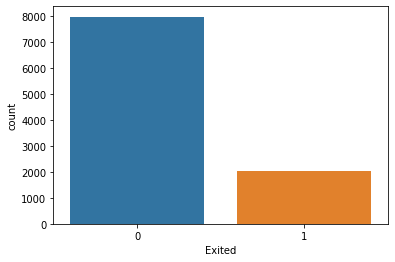

In [9]:
sns.countplot(x=df['Exited'],data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

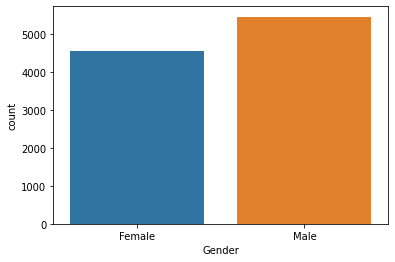

In [10]:
sns.countplot(x=df['Gender'],data=df)

C:\Users\Bipul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

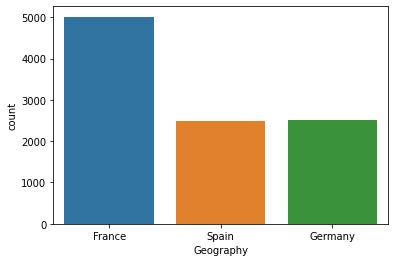

In [11]:
sns.countplot(df['Geography'])

In [12]:
#Checking Null Values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* Null values are not present in our dataset

In [13]:
#Handling Categorical Variables
df=pd.get_dummies(df,drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<AxesSubplot:>

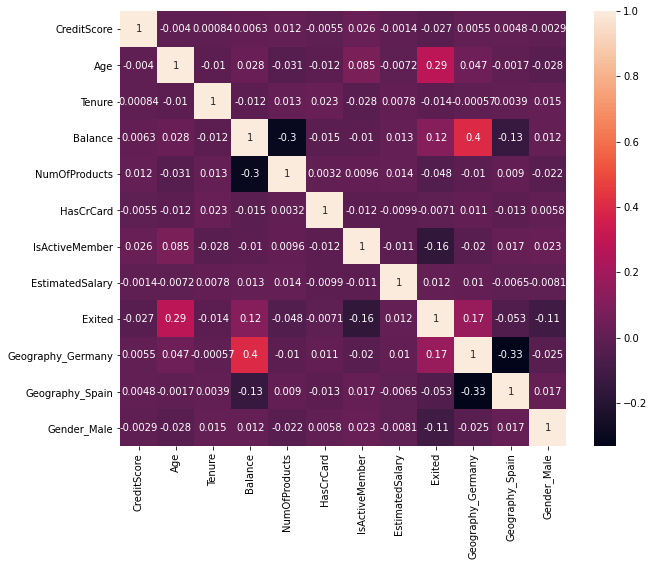

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [16]:
#Dividing the Data into X and y
X=df.drop('Exited',axis=1)
y=df['Exited']

In [17]:
X.shape

(10000, 11)

In [18]:
y.shape

(10000,)

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [20]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape

(8000, 11)

In [42]:
type(X_train)

pandas.core.frame.DataFrame

In [22]:
X_test.shape

(2000, 11)

In [23]:
y_train.shape

(8000,)

In [29]:
type(y_train)

pandas.core.series.Series

In [36]:
y_train[2]

1

In [43]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [44]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [49]:
print(X_train.shape)
print(y_train.shape)

(8000, 11)
(8000,)


## Create Artificial Neural Network

* Sequential usually refers to an entire model, not just one layer. 
* Sequential refers to the way you build models in Keras using the sequential api from keras.
* To install keras run the command pip install keras.

In [45]:
#Importiing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

In [46]:
keras.__version__

'2.7.0'

In [47]:
import tensorflow as tf
tf.__version__

'2.7.1'

In [48]:
#Initializing the ANN
ann_clf=Sequential()

* In keras default activation function is Relu
* The default weight initializer is glorot initializer

In [50]:
#adding the input layer and first hidden layer
ann_clf.add(Dense(activation='relu',input_dim=11,units=6,kernel_initializer='uniform'))

In [51]:
##Adding the second hidden layer
ann_clf.add(Dense(activation='relu',units=6,kernel_initializer='uniform'))

In [52]:
#adding the outputlayer
ann_clf.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

In [53]:
#compiling the ann
ann_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Model Summery

In [54]:
ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [55]:
##Fiting the ann to the training set
ann_clf.fit(X_train,y_train,validation_split=0.33,batch_size=32,epochs=100)

Epoch 1/100
168/168 [==============================] - 3s 5ms/step - loss: 0.6421 - accuracy: 0.7944 - val_loss: 0.5434 - val_accuracy: 0.7910
Epoch 2/100
168/168 [==============================] - 1s 3ms/step - loss: 0.4712 - accuracy: 0.7962 - val_loss: 0.4470 - val_accuracy: 0.7910
Epoch 3/100
168/168 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.7962 - val_loss: 0.4424 - val_accuracy: 0.7910
Epoch 4/100
168/168 [==============================] - 1s 3ms/step - loss: 0.4301 - accuracy: 0.7962 - val_loss: 0.4400 - val_accuracy: 0.7910
Epoch 5/100
168/168 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.7962 - val_loss: 0.4371 - val_accuracy: 0.7910
Epoch 6/100
168/168 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.7962 - val_loss: 0.4346 - val_accuracy: 0.7910
Epoch 7/100
168/168 [==============================] - 1s 3ms/step - loss: 0.4214 - accuracy: 0.8007 - val_loss: 0.4318 - val_accuracy: 0.8152

In [56]:
# Predicting the Test set results
y_pred = ann_clf.predict(X_test)

In [57]:
y_pred

array([[0.14203724],
       [0.04224598],
       [0.19889298],
       ...,
       [0.7969034 ],
       [0.04797551],
       [0.18431097]], dtype=float32)

In [58]:
y_pred = (y_pred > 0.5)

In [59]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

## Confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1533,   74],
       [ 229,  164]], dtype=int64)

## Accuracy

In [61]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8485

* One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
* Since one epoch is too big to feed to the computer at once we divide it in several smaller batches.